In [18]:
import pandas as pd

diabetes_data_1 = pd.read_csv('../raw_data/diabetes.csv')

# Check for missing values
missing_values = diabetes_data_1.isnull().sum()
print("Missing values:")
print(missing_values)

# Impute missing values with the mean of the columns
cleaned_data = diabetes_data_1.fillna(diabetes_data_1.mean())

cleaned_data.to_csv('../cleaned_data/cleaned_diabetes_data.csv', index=False)


Missing values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


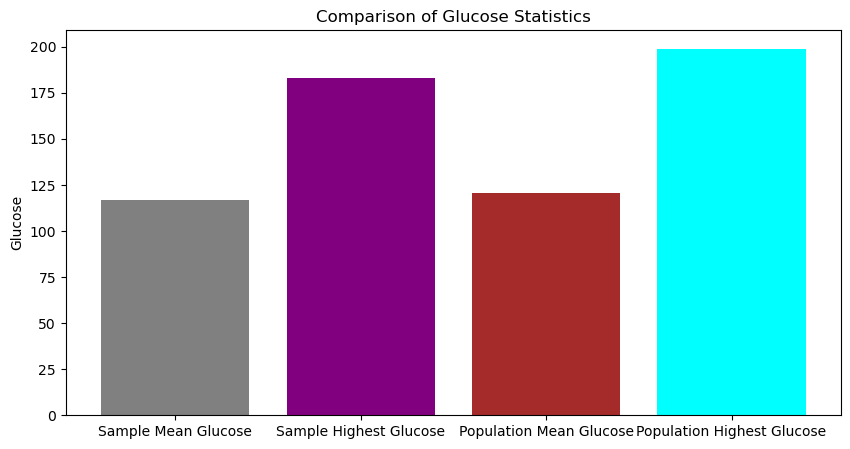

In [6]:
#a. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

diabetes_data = pd.read_csv('../cleaned_data/cleaned_diabetes_data.csv')

# Set seed for reproducibility
np.random.seed(42)

# Random sample of 25 observations
sample = diabetes_data.sample(n=25)

# calculate the Mean and highest Glucose values of the sample
sample_mean_glucose = sample['Glucose'].mean()
sample_highest_glucose = sample['Glucose'].max()

population_mean_glucose = diabetes_data['Glucose'].mean()
population_highest_glucose = diabetes_data['Glucose'].max()


plt.figure(figsize=(10, 5))
plt.bar(['Sample Mean Glucose', 'Sample Highest Glucose', 'Population Mean Glucose', 'Population Highest Glucose'],
        [sample_mean_glucose, sample_highest_glucose, population_mean_glucose, population_highest_glucose],
        color=['gray', 'purple', 'brown', 'cyan'])
plt.ylabel('Glucose')
plt.title('Comparison of Glucose Statistics')
plt.show()



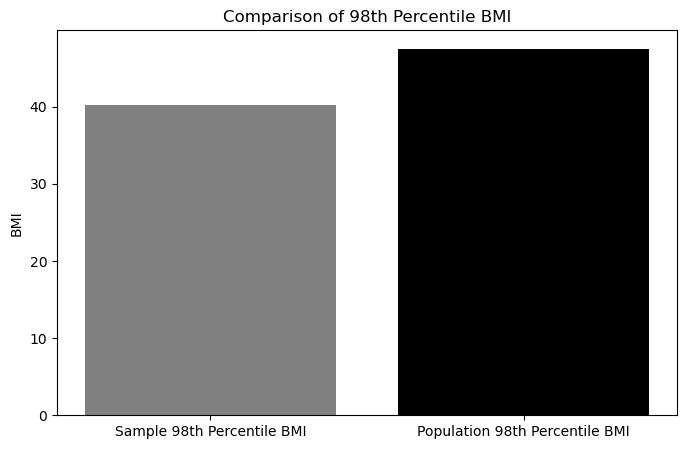

In [7]:
# b.

# take the 98th percentile of BMI for sample and population
sample_98th_percentile_bmi = np.percentile(sample['BMI'], 98)
population_98th_percentile_bmi = np.percentile(diabetes_data['BMI'], 98)

# Now Creating a bar plot for comparison
plt.figure(figsize=(8, 5))
plt.bar(['Sample 98th Percentile BMI', 'Population 98th Percentile BMI'],
        [sample_98th_percentile_bmi, population_98th_percentile_bmi],
        color=['gray', 'black'])
plt.ylabel('BMI')
plt.title('Comparison of 98th Percentile BMI')
plt.show()


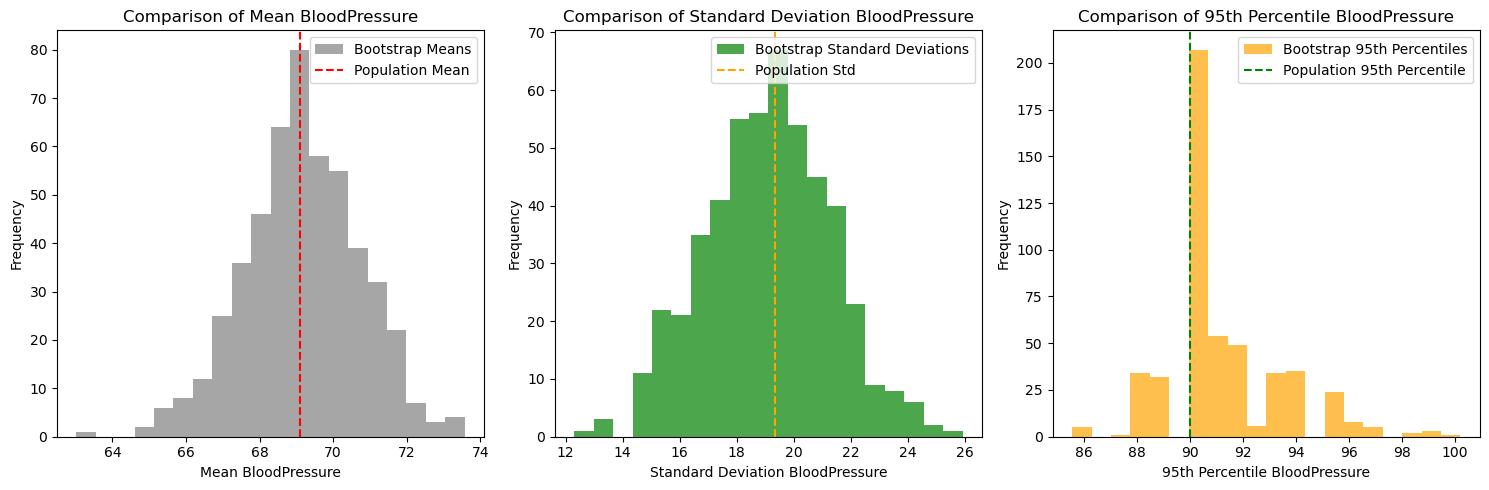

In [8]:
# c.

population_bp = diabetes_data['BloodPressure']

bootstrap_means = []
bootstrap_stds = []
bootstrap_percentiles = []

num_bootstrap_samples = 500
sample_size = 150

for _ in range(num_bootstrap_samples):
   
    bootstrap_sample = population_bp.sample(n=sample_size, replace=True)
    
    bootstrap_mean = bootstrap_sample.mean()
    bootstrap_std = bootstrap_sample.std()
    bootstrap_percentile = np.percentile(bootstrap_sample, 95)
    
    bootstrap_means.append(bootstrap_mean)
    bootstrap_stds.append(bootstrap_std)
    bootstrap_percentiles.append(bootstrap_percentile)


population_mean_bp = population_bp.mean()
population_std_bp = population_bp.std()
population_percentile_bp = np.percentile(population_bp, 95)


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(bootstrap_means, bins=20, color='gray', alpha=0.7, label='Bootstrap Means')
plt.axvline(x=population_mean_bp, color='red', linestyle='--', label='Population Mean')
plt.xlabel('Mean BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Mean BloodPressure')
plt.legend()

plt.subplot(1, 3, 2)
plt.hist(bootstrap_stds, bins=20, color='green', alpha=0.7, label='Bootstrap Standard Deviations')
plt.axvline(x=population_std_bp, color='orange', linestyle='--', label='Population Std')
plt.xlabel('Standard Deviation BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of Standard Deviation BloodPressure')
plt.legend()

plt.subplot(1, 3, 3)
plt.hist(bootstrap_percentiles, bins=20, color='orange', alpha=0.7, label='Bootstrap 95th Percentiles')
plt.axvline(x=population_percentile_bp, color='green', linestyle='--', label='Population 95th Percentile')
plt.xlabel('95th Percentile BloodPressure')
plt.ylabel('Frequency')
plt.title('Comparison of 95th Percentile BloodPressure')
plt.legend()

plt.tight_layout()
plt.show()